In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

### Exploratory Data Analysis

In [4]:
# change column names to lower case and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [13]:
# change object columns values to lower case and replace spaces with underscores
for col in df.dtypes[df.dtypes == 'object'].index.to_list():
    df[col] = df[col].str.lower().str.replace(' ', '_')

Target Variable Analysis

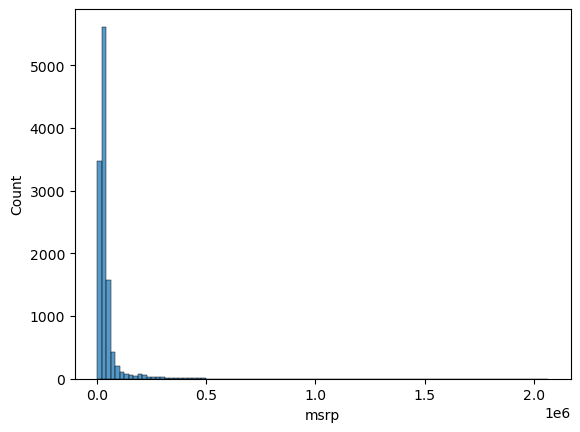

In [73]:
sns.histplot(df.msrp, bins=100);
# tail of the distribution is very long, so we need to transform it to make it more normally distributed
# we will use log transformation
price_logs = np.log1p(df.msrp)
df['msrp_log'] = price_logs

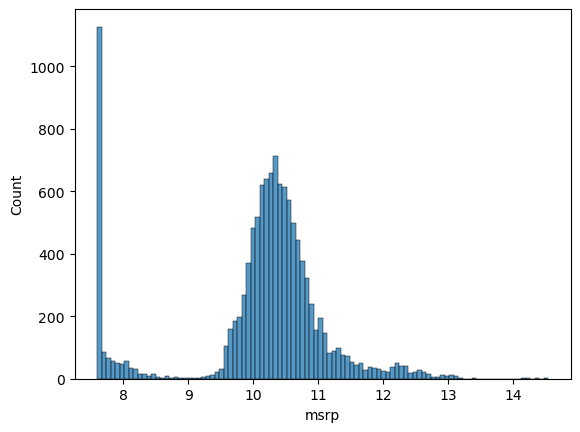

In [66]:
sns.histplot(price_logs, bins=100);
# now the distribution looks more normal

Missing Value Analysis

In [43]:
print(df.isnull().sum().sort_values(ascending=False))

market_category      3742
engine_hp              69
engine_cylinders       30
number_of_doors         6
engine_fuel_type        3
make                    0
model                   0
year                    0
transmission_type       0
driven_wheels           0
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


In [44]:
print(round(df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100))

market_category      31.0
engine_hp             1.0
engine_cylinders      0.0
number_of_doors       0.0
engine_fuel_type      0.0
make                  0.0
model                 0.0
year                  0.0
transmission_type     0.0
driven_wheels         0.0
vehicle_size          0.0
vehicle_style         0.0
highway_mpg           0.0
city_mpg              0.0
popularity            0.0
msrp                  0.0
dtype: float64


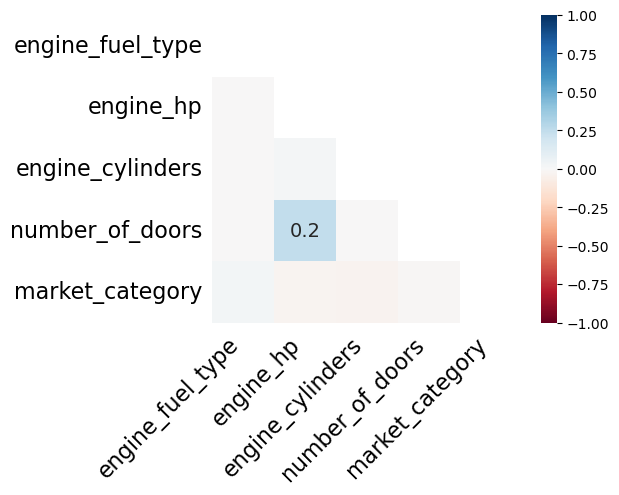

In [36]:
msno.heatmap(df, figsize=(5, 4));
# there is no correlation between missing values

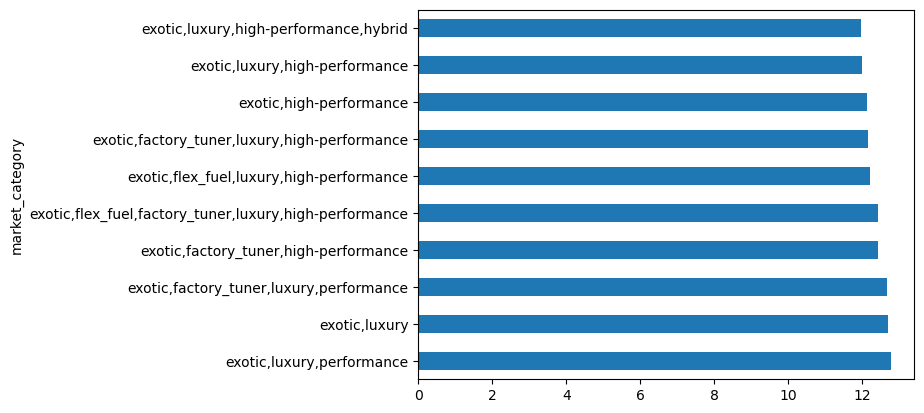

In [75]:
df.groupby('market_category').msrp_log.mean().sort_values(ascending=False).head(10).plot.barh();

In [74]:
df[df.market_category.isnull()].msrp_log

87        7.601402
88        7.601402
91        7.601402
92        7.601402
93        7.601402
           ...    
11794     7.601402
11809     9.677277
11810     9.743964
11867    11.074746
11868    11.120194
Name: msrp_log, Length: 3742, dtype: float64